<a href="https://colab.research.google.com/github/ku1esh00v/AI_Machine_Learning_3/blob/main/AI_%26_ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 3

**Метрические методы классификации**

In [1]:
# Подгрузка данных
!wget https://raw.githubusercontent.com/ku1esh00v/AI_Machine_Learning_1/main/code%20and%20dataset/citrus.data

--2024-04-29 22:34:19--  https://raw.githubusercontent.com/ku1esh00v/AI_Machine_Learning_1/main/code%20and%20dataset/citrus.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3353 (3.3K) [text/plain]
Saving to: ‘citrus.data’

citrus.data         100%[===================>]   3.27K  --.-KB/s    in 0s      

2024-04-29 22:34:20 (32.0 MB/s) - ‘citrus.data’ saved [3353/3353]



In [3]:
import pandas as pd
import numpy as np

data_source = 'citrus.data'
d = pd.read_table(data_source, delimiter=',',
                  header=None,
                  names=['sepal_length','sepal_width',
                         'petal_length','petal_width','answer'])
d.head()

,sepal_length,sepal_width,petal_length,petal_width,answer
0,2.96,172,85,2,orange
1,3.91,166,78,3,orange
2,4.42,156,81,2,orange
3,4.47,163,81,4,orange
4,4.48,161,72,9,orange


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    int64  
 2   petal_length  150 non-null    int64  
 3   petal_width   150 non-null    int64  
 4   answer        150 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 6.0+ KB


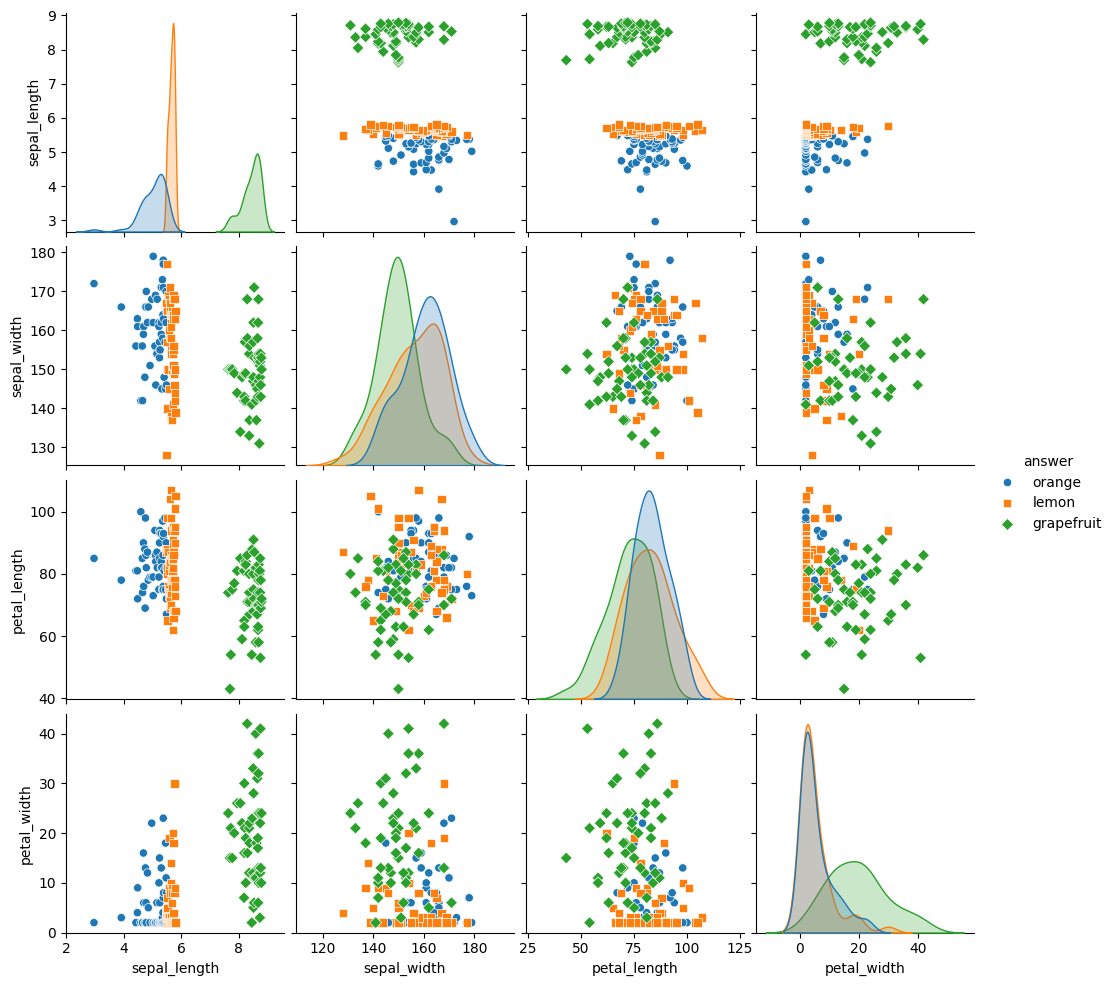

In [5]:
import seaborn as sb
%matplotlib inline
sb.pairplot(d, hue='answer', markers=["o", "s", "D"])

In [6]:
from sklearn.neighbors import KNeighborsClassifier

X_train = d[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_train = d['answer']

K = 3

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)
# построение модели классификатора (процедура обучения)
knn.fit(X_train.values, y_train)

# Использование классификатора
# Объявление признаков объекта
X_test = np.array([[1.2, 1.0, 2.8, 1.2]])
# Получение ответа для нового объекта
target = knn.predict(X_test)
print(target)

['grapefruit']


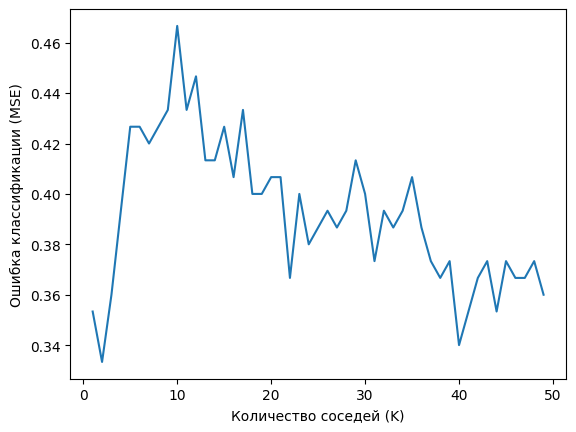

Оптимальные значения K:  [2]


In [7]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Значения параметра K
k_list = list(range(1,50))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения K
for K in k_list:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, d.iloc[ : , 0:4 ], d['answer'], cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(k_list, MSE)
plt.xlabel('Количество соседей (K)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
k_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_k_min = []
for i in range(len(MSE)):
    if MSE[i] <= k_min:
        all_k_min.append(k_list[i])

# печатаем все K, оптимальные для модели
print('Оптимальные значения K: ', all_k_min)

Палитры, которые можно использовать для визуализации

In [8]:
print(sorted(list(plt.colormaps)))

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r

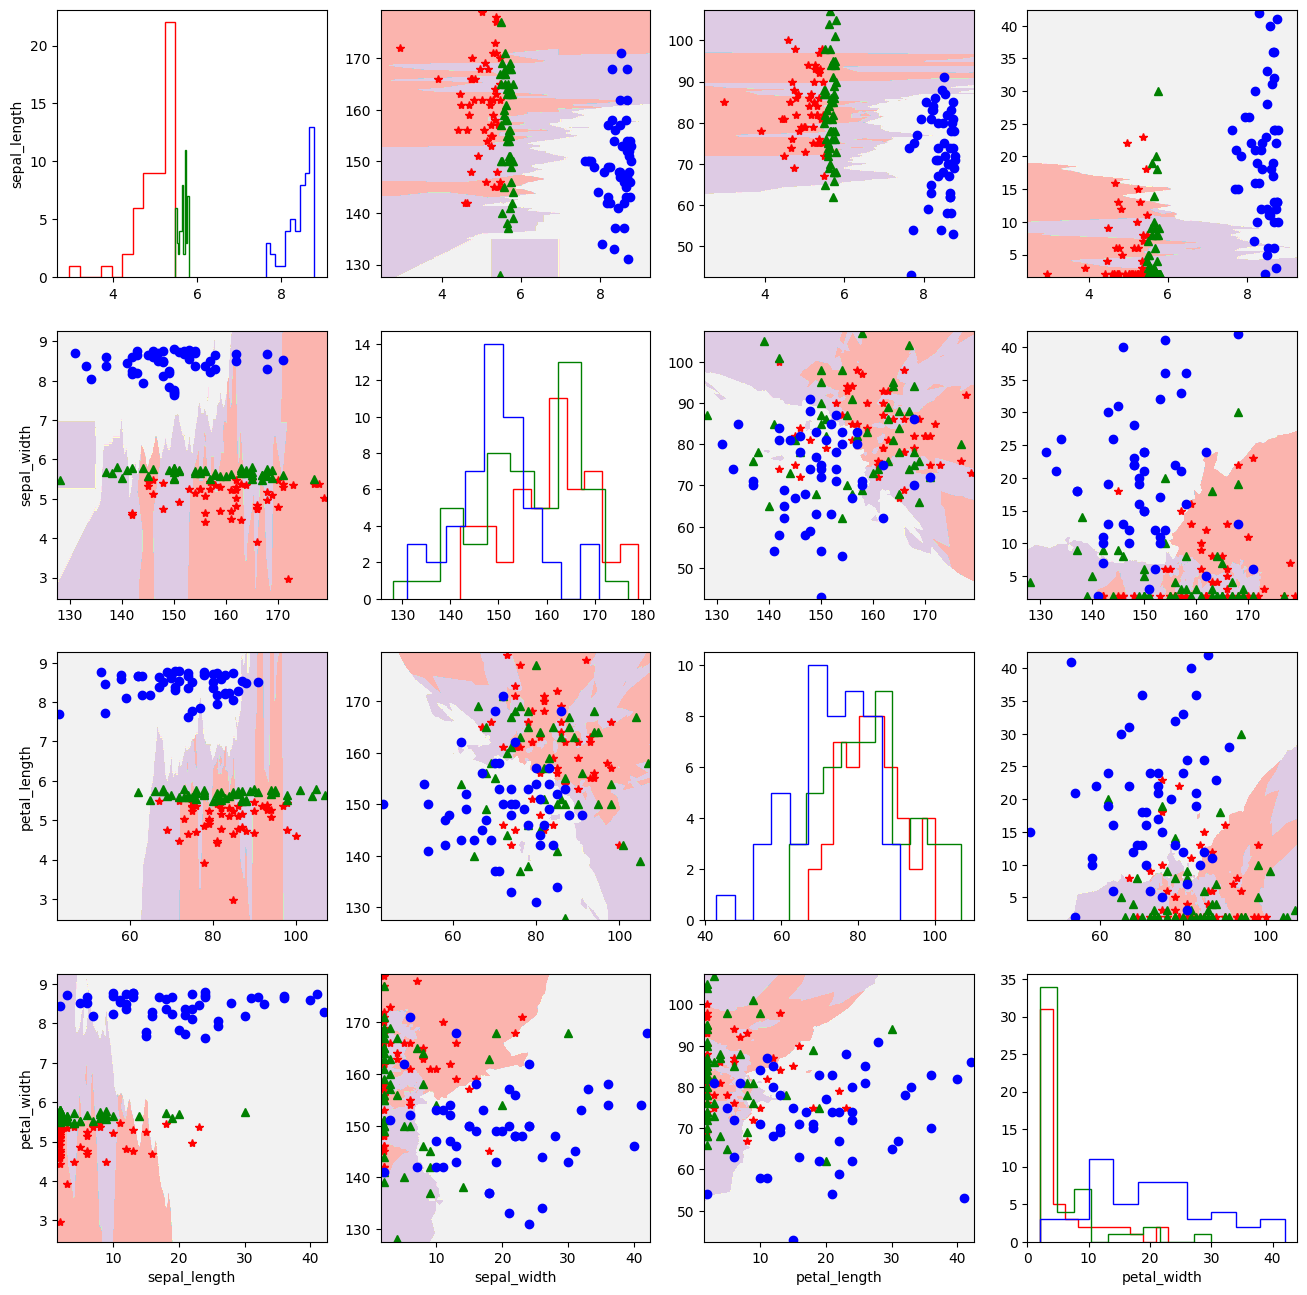

In [9]:
dX = d.iloc[:,0:4]
dy = d['answer']

plot_markers = ['r*', 'g^', 'bo']
answers = dy.unique()

# Создаем подграфики для каждой пары признаков
f, places = plt.subplots(4, 4, figsize=(16,16))

fmin = dX.min()-0.5
fmax = dX.max()+0.5
plot_step = 0.05

# Обходим все subplot
for i in range(0,4):
    for j in range(0,4):

        # Строим решающие границы
        if(i != j):
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                               np.arange(fmin[j], fmax[j], plot_step))
            model = KNeighborsClassifier(n_neighbors=13)
            model.fit(dX.iloc[:, [i,j]].values, dy)
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            p = p.reshape(xx.shape)
            p[p==answers[0]] = 0
            p[p==answers[1]] = 1
            p[p==answers[2]] = 2
            p=p.astype('int32')
            places[i,j].contourf(xx, yy, p, cmap='Pastel1')

        # Обход всех классов
        for id_answer in range(len(answers)):
            idx = np.where(dy == answers[id_answer])
            if i==j:
                places[i, j].hist(dX.iloc[idx].iloc[:,i],
                                  color=plot_markers[id_answer][0],
                                 histtype = 'step')
            else:
                places[i, j].plot(dX.iloc[idx].iloc[:,i], dX.iloc[idx].iloc[:,j],
                                  plot_markers[id_answer],
                                  label=answers[id_answer], markersize=6)

        if j==0:
            places[i, j].set_ylabel(dX.columns[i])

        if i==3:
            places[i, j].set_xlabel(dX.columns[j])